<a href="https://colab.research.google.com/github/jelade/Jaleel/blob/master/Jaleel_First_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning** **Examination**

## **THE MEMBERS OF THE GROUP:**
# 1. Adejumo Abduljaleel
# 2. Okon God'spower Emmanuel
# 3. Aissata Diop

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split



> Question 1.






In [ ]:
data_set = pd.read_csv('sample_data/aims_house_data.csv')

In [ ]:
print(data_set.head())

           id             date     price  ...     long  sqft_living15  sqft_lot15
0  7129300520  20141013T000000  221900.0  ... -122.257           1340        5650
1  6414100192  20141209T000000  538000.0  ... -122.319           1690        7639
2  5631500400  20150225T000000  180000.0  ... -122.233           2720        8062
3  2487200875  20141209T000000  604000.0  ... -122.393           1360        5000
4  1954400510  20150218T000000  510000.0  ... -122.045           1800        7503

[5 rows x 21 columns]


In [ ]:
print(data_set.describe().transpose())

                 count          mean  ...           75%           max
id             21613.0  4.580302e+09  ...  7.308900e+09  9.900000e+09
price          21613.0  5.400881e+05  ...  6.450000e+05  7.700000e+06
bedrooms       21613.0  3.370842e+00  ...  4.000000e+00  3.300000e+01
bathrooms      21613.0  2.114757e+00  ...  2.500000e+00  8.000000e+00
sqft_living    21613.0  2.079900e+03  ...  2.550000e+03  1.354000e+04
sqft_lot       21613.0  1.510697e+04  ...  1.068800e+04  1.651359e+06
floors         21613.0  1.494309e+00  ...  2.000000e+00  3.500000e+00
waterfront     21613.0  7.541757e-03  ...  0.000000e+00  1.000000e+00
view           21613.0  2.343034e-01  ...  0.000000e+00  4.000000e+00
condition      21613.0  3.409430e+00  ...  4.000000e+00  5.000000e+00
grade          21613.0  7.656873e+00  ...  8.000000e+00  1.300000e+01
sqft_above     21613.0  1.788391e+03  ...  2.210000e+03  9.410000e+03
sqft_basement  21613.0  2.915090e+02  ...  5.600000e+02  4.820000e+03
yr_built       21613

In [ ]:
data_set.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# **Question 1.2**

In [ ]:
data_std_y=data_set.price.std()
data_mean_y=data_set.price.mean()

data_std_x=data_set.sqft_lot.std()
data_mean_x=data_set.sqft_lot.mean()

lower_y, upper_y = data_mean_y- 3 * data_std_y, data_mean_y + 3 * data_std_y
lower_x, upper_x = data_mean_x- 3 * data_std_x, data_mean_x + 3 * data_std_x
print("For Y dimension; Std : {}, Mean : {}, Lower : {}, Upper : {}".format(data_std_y,data_mean_y,lower_y,upper_y))
print("For X dimension; Std : {}, Mean : {}, Lower : {}, Upper : {}".format(data_std_x,data_mean_x,lower_x,upper_x))


outliers_std_x = [x for x in data_set.sqft_lot if x < lower_x or x > upper_x]
outliers_std_y = [x for x in data_set.price if x < lower_y or x > upper_y]


For Y dimension; Std : 367127.1964826997, Mean : 540088.1417665294, Lower : -561293.4476815696, Upper : 1641469.7312146286
For X dimension; Std : 41420.51151513528, Mean : 15106.967565816869, Lower : -109154.56697958897, Upper : 139368.5021112227


In [ ]:
sqft_lot = data_set['sqft_lot']
price = data_set['price']

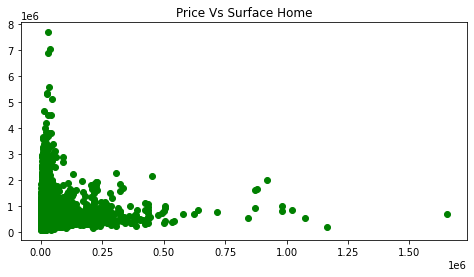

In [ ]:
plt.figure(figsize=(8,4))
plt.title("Price Vs Surface Home")
plt.scatter(sqft_lot,price, c="green")

The graph shows that the relationship between the is not linear and clustered with outliers. This will be good to remove some outliers from the data.


# **Question 1.3**

In [ ]:
df_train, df_test = train_test_split(data_set, train_size=0.8, test_size=0.2)

In [ ]:
x_train = df_train['sqft_lot']
y_train = df_train['price']
x_test = df_test['sqft_lot']
y_test = df_test['price']


x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)


x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [ ]:
n=len(x_train)
x=np.array([np.ones(n), df_train['sqft_lot'].values]).T
y=y_train
theta=np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
theta

array([5.30988609e+05, 7.53611796e-01])

***4. Replace the parameter values
in the hθ(x) hypothesis and plot the straight line we found,
to check that it fits the data.***

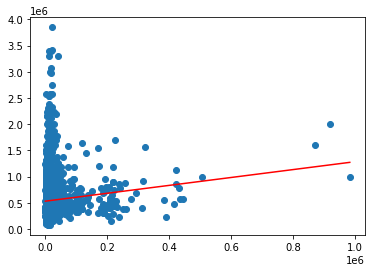

In [ ]:
y_pred = theta[1]*x_test + theta[0]

plt.scatter(x_test, y_test)
plt.plot([min(x_test), max(x_test)], [min(y_pred), max(y_pred)], color='red') 
plt.show()

## **Question 1.5**

In [ ]:
y_pred1 = theta[1]*5400 + theta[0]
y_pred2 = theta[1]*12500 + theta[0]
print("Prediction of 5400: {} --- Prediction for 12500:{}".format(y_pred1,y_pred2))

Prediction of 5400: 535058.112999914 --- Prediction for 12500:540408.7567493493


# Question 1.6

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#find the learning parameters theta0 and theta1
theta0=model.intercept_
theta1=model.coef_
print("The learning model h(surface_home)=",round(theta0,2),"+",round(theta1[0],2),"surface_home")

The learning model h(surface_home)= 530988.61 + 0.75 surface_home


In [ ]:
y_pred = model.predict(x_test)
df_test['predicted'] = y_pred

In [ ]:
model.predict(np.array([[5400],[12500]]))

array([535058.11299991, 540408.75674935])

## **Question 2. Multivariate linear regression**

In [ ]:
x0=np.ones(data_set.shape[0]) 
x1=data_set['bedrooms'] 
x2=data_set['bathrooms'] 
x3=data_set['sqft_living']
x4=data_set['sqft_lot'] 
x5=data_set['floors']
x6=data_set['waterfront']
x7=data_set['view']
x8=data_set['condition']
x9=data_set['grade']
x10=data_set['yr_built']
x11=data_set['yr_renovated']
ynew = data_set['price']

## **Question 2.1**

In [ ]:
x_data=np.array([x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11]).transpose()
y_data=np.array(ynew)
print(x_data.shape)
print(y_data.shape)
data_frame = pd.DataFrame(x_data,y_data, columns= ('x0','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','yr_built','yr_renovated'))
data_frame.reset_index()
data_frame.shape

(21613, 12)
(21613,)


(21613, 12)

In [ ]:
corvar=np.array([ynew, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11]).transpose()
data_frame = pd.DataFrame(corvar, columns= ('price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','yr_built','yr_renovated'))
data_frame

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1955.0,0.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,1951.0,1991.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,1933.0,0.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1965.0,0.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1987.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3.0,8.0,2009.0,0.0
21609,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3.0,8.0,2014.0,0.0
21610,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3.0,7.0,2009.0,0.0
21611,400000.0,3.0,2.50,1600.0,2388.0,2.0,0.0,0.0,3.0,8.0,2004.0,0.0


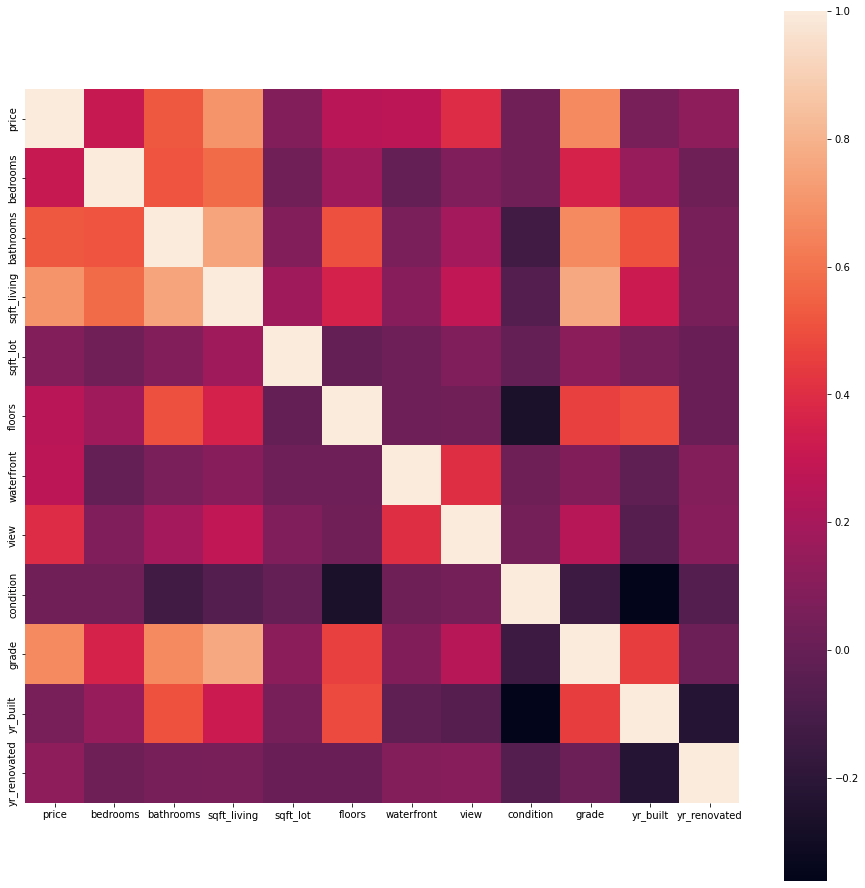

In [ ]:
corrmat1 = data_frame.corr()
plt.subplots(figsize=(16, 16))
sns.heatmap(corrmat1,square = True);

##  The graph shows that bathroom have a moderate correlation with price of the houses. Also, surface leaving is highly correlated with price and grade is also corellated with price. 


In [ ]:
data_frame.describe().transpose

<bound method DataFrame.transpose of               price      bedrooms  ...      yr_built  yr_renovated
count  2.161300e+04  21613.000000  ...  21613.000000  21613.000000
mean   5.400881e+05      3.370842  ...   1971.005136     84.402258
std    3.671272e+05      0.930062  ...     29.373411    401.679240
min    7.500000e+04      0.000000  ...   1900.000000      0.000000
25%    3.219500e+05      3.000000  ...   1951.000000      0.000000
50%    4.500000e+05      3.000000  ...   1975.000000      0.000000
75%    6.450000e+05      4.000000  ...   1997.000000      0.000000
max    7.700000e+06     33.000000  ...   2015.000000   2015.000000

[8 rows x 12 columns]>

In [ ]:
data_frame.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.054012,0.126434
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.154178,0.018841
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.506019,0.050739
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.318049,0.055363
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.053080,0.007644
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.489319,0.006338
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,-0.026161,0.092885
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,-0.053440,0.103917
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.361417,-0.060618
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.446963,0.014414


In [ ]:
corvar1=np.array([ynew, x2, x3, x7, x9]).transpose()
data_frame1 = pd.DataFrame(corvar1, columns= ('price','bathrooms','sqft_living','view','grade'))
data_frame1

,price,bathrooms,sqft_living,view,grade
0,221900.0,1.00,1180.0,0.0,7.0
1,538000.0,2.25,2570.0,0.0,7.0
2,180000.0,1.00,770.0,0.0,6.0
3,604000.0,3.00,1960.0,0.0,7.0
4,510000.0,2.00,1680.0,0.0,8.0
...,...,...,...,...,...
21608,360000.0,2.50,1530.0,0.0,8.0
21609,400000.0,2.50,2310.0,0.0,8.0
21610,402101.0,0.75,1020.0,0.0,7.0
21611,400000.0,2.50,1600.0,0.0,8.0


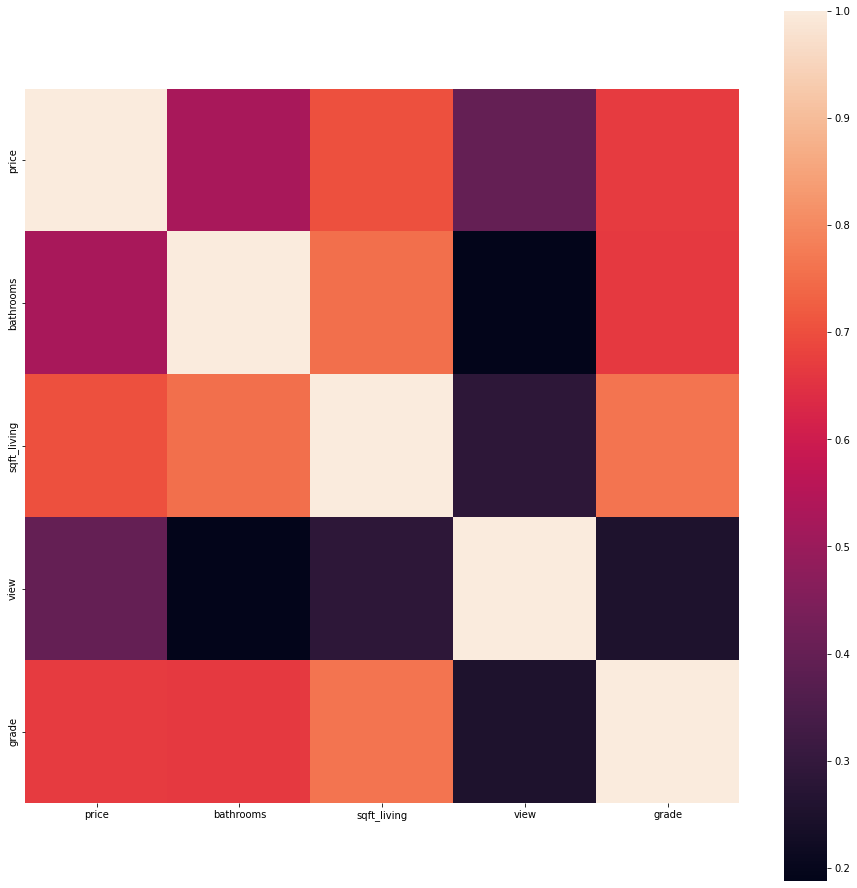

In [ ]:
corrmat1 = data_frame1.corr()
plt.subplots(figsize=(16, 16))
sns.heatmap(corrmat1, square=True);

# Question 2.2

In [ ]:
X = np.matrix([np.ones(len(data_set)),x1.values,x2.values,x3.values,x4.values,x5.values,x6.values,x7.values,x8.values,x9.values,x10.values,x11.values]).T
y = np.matrix(data_set['price']).T

In [ ]:
def normal_equation(X, Y):
    beta = np.dot((np.linalg.inv(np.dot(X.T,X))), np.dot(X.T,Y))

    return beta.transpose()

In [ ]:
normal_equation(X,y)

matrix([[ 6.19900540e+06, -3.87930214e+04,  4.59252042e+04,
          1.70511038e+02, -2.57118024e-01,  2.38233359e+04,
          5.73808425e+05,  4.53349739e+04,  1.88667529e+04,
          1.24262388e+05, -3.57335136e+03,  8.58038627e+00]])

## **Question 2.3**

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([ 0.00000000e+00, -3.87863095e+04,  4.71857181e+04,  1.71382238e+02,
       -2.88470008e-01,  2.18488084e+04,  5.50563624e+05,  4.52703993e+04,
        1.85284224e+04,  1.22743410e+05, -3.55776364e+03,  1.04328799e+01])

In [ ]:
model.intercept_

6179758.231619344